# Extraction of information from the github and jobs by location

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url_base = "job-postings.xlsx"

In [3]:
#Open the whole wrokbook
f = pd.ExcelFile(url_base)

In [4]:
f

In [5]:
df = pd.read_excel(url_base, sheet_name=None)

In [6]:
df

{'Sheet':    Los Angeles  New York  San Francisco  Washington DC  Seattle  Austin  \
 0          640      3226            435           5316     3375     434   
 
    Detroit  
 0     3945  ,
 'Sheet2':        C   C#  C++  Java  JavaScript  Python  Scala  Oracle  SQL Server  \
 0  13498  333  305  2609         355    1173     33     784         250   
 
    MySQL Server  PostgreSQL  MongoDB  
 0             0          10      174  }

In [7]:
f.sheet_names

['Sheet', 'Sheet2']

In [8]:
#Creates two DataFrames, one for each spreadsheet
df1, df2 = f.parse(f.sheet_names[0]), f.parse(f.sheet_names[1])

In [9]:
df1

,Los Angeles,New York,San Francisco,Washington DC,Seattle,Austin,Detroit
0,640,3226,435,5316,3375,434,3945


In [10]:
df2

,C,C#,C++,Java,JavaScript,Python,Scala,Oracle,SQL Server,MySQL Server,PostgreSQL,MongoDB
0,13498,333,305,2609,355,1173,33,784,250,0,10,174


In [11]:
df1.value_counts()

Los Angeles  New York  San Francisco  Washington DC  Seattle  Austin  Detroit
640          3226      435            5316           3375     434     3945       1
dtype: int64

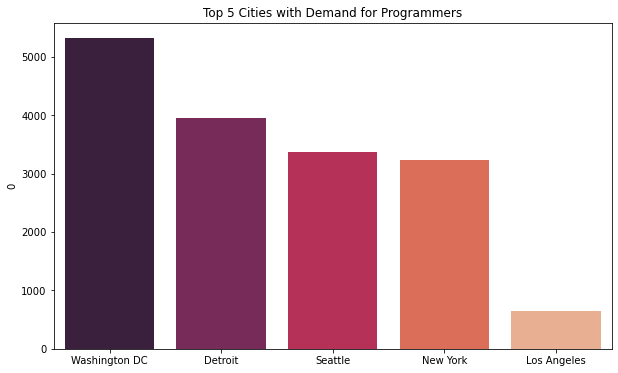

In [12]:
plt.figure(figsize=(10, 6))

sns.barplot(x=[x for x, i in df1.iloc[0].nlargest().items()], y=df1.iloc[0].nlargest(), palette=sns.color_palette("rocket", 5))
plt.title("Top 5 Cities with Demand for Programmers")
plt.savefig("Top 5 Cities with Demand for Programmers.jpg")

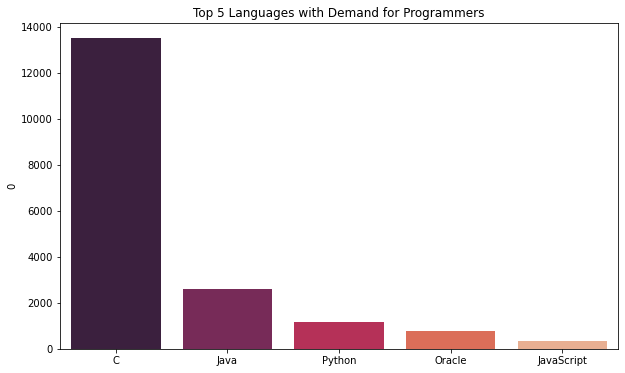

In [13]:
plt.figure(figsize=(10, 6))

sns.barplot(x=[x for x, i in df2.iloc[0].nlargest().items()], y=df2.iloc[0].nlargest(), palette=sns.color_palette("rocket", 5))
plt.title("Top 5 Languages with Demand for Programmers")
plt.savefig("Top 5 Languages with Demand for Programmers.jpg")

In [14]:
df1

,Los Angeles,New York,San Francisco,Washington DC,Seattle,Austin,Detroit
0,640,3226,435,5316,3375,434,3945


In [15]:
df3 = pd.read_csv("popular-languages.csv")

In [16]:
df3

,Unnamed: 0,Language,Average Annual Salary
0,0,Python,"$114,383"
1,1,Java,"$101,013"
2,2,R,"$92,037"
3,3,Javascript,"$110,981"
4,4,Swift,"$130,801"
5,5,C++,"$113,865"
6,6,C#,"$88,726"
7,7,PHP,"$84,727"
8,8,SQL,"$84,793"
9,9,Go,"$94,082"


In [17]:
df1.iloc[0].nlargest().items()

In [18]:
[x for x, i in df1.iloc[0].nlargest().items()]

['Washington DC', 'Detroit', 'Seattle', 'New York', 'Los Angeles']

In [19]:
#Clean up and formatting of the values of the column "Average Annual Salary"
df3['Average Annual Salary']=df3['Average Annual Salary'].str.replace(',', '').str.replace('$', '').astype(int)

/tmp/ipykernel_30373/3550526160.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df3['Average Annual Salary']=df3['Average Annual Salary'].str.replace(',', '').str.replace('$', '').astype(int)


In [20]:
df3.sort_values(by=['Average Annual Salary'], ascending=False)

,Unnamed: 0,Language,Average Annual Salary
4,4,Swift,130801
0,0,Python,114383
5,5,C++,113865
3,3,Javascript,110981
1,1,Java,101013
9,9,Go,94082
2,2,R,92037
6,6,C#,88726
8,8,SQL,84793
7,7,PHP,84727


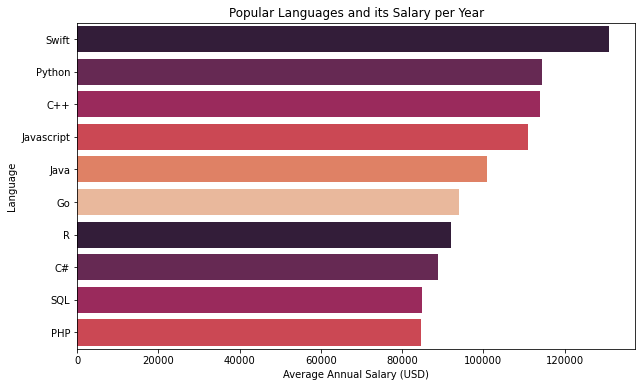

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(x=df3.sort_values(by=['Average Annual Salary'], ascending=False)['Average Annual Salary'], y=df3.sort_values(by=['Average Annual Salary'], ascending=False)['Language'], palette=sns.color_palette("rocket"))
plt.xlabel("Average Annual Salary (USD)")
plt.title("Popular Languages and its Salary per Year")
plt.savefig("Popular Languages and its Salary per Year.jpg")